In [60]:
def get_ytw(start_date='2009-01-31'):
    import nb_credit_spread as cslibrary

    cslib = cslibrary.creditspread()
    # start_date = '2009-01-31' #'1990-01-31' # '2009-01-31'

    ytw = cslib.get_ytw_from_date_delta(start=start_date)
    return ytw

In [66]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# TB-3MO-TY model_min+1: 3 info_crit_min:-338.24707299702334
# TB-1YR-TY model_min+1: 3 info_crit_min:-273.43164719772847
# TB-5YR-TY model_min+1: 1 info_crit_min:-29.866645552508636

column = 'Econ-UNRATE'
df = get_ytw()
# df[f'{column}-log'] = np.log(df[column]).dropna()
tb = df[column]
exog = tb
num, trend = 10, None
info_crit = np.zeros(shape=(num, 1))
for i in range(num):
    order = (i + 1, 1, 0)
    
    # model_fit = VAR(endog=endog).fit(maxlags=i + 1, verbose=True)
    # print(f"{colname} checking {order} trend {trend}")
    model_fit = ARIMA(endog=exog, exog=None, order=order, trend=trend).fit()
    print(f"{column} order: {order} BIC: {model_fit.bic}")
    # AIC, BIC, HQIC
    # print(f'order: {order} bic: {model_fit.bic}')
    ''' ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals '''
    info_crit[i] = model_fit.bic  # update poistion with info criteria result

# print(f"BIC critical values:\n{info_crit}")

info_crit_min = np.min(info_crit)
model_min = np.argmin(info_crit)    # returns first position of minimum value

print(f"{column} model_min+1: {model_min+1} info_crit_min:{info_crit_min}")


Econ-UNRATE order: (1, 1, 0) BIC: -99.54127086349885
Date
2009-01-31    8.300000
2009-02-28    0.400000
2009-03-31    0.267829
2009-04-30    0.375871
2009-05-31    0.067829
                ...   
2019-03-31   -0.200000
2019-04-30    0.016086
2019-05-31    0.100000
2019-06-30   -0.008043
2019-07-31    0.000000
Freq: M, Length: 127, dtype: float64
Econ-UNRATE order: (2, 1, 0) BIC: -95.44601670999896
Date
2009-01-31    8.300000
2009-02-28    0.400000
2009-03-31    0.266508
2009-04-30    0.345275
2009-05-31    0.045460
                ...   
2019-03-31   -0.184205
2019-04-30    0.015423
2019-05-31    0.115795
2019-06-30   -0.007712
2019-07-31   -0.007898
Freq: M, Length: 127, dtype: float64
Econ-UNRATE order: (3, 1, 0) BIC: -90.83426221589036
Date
2009-01-31    8.300000
2009-02-28    0.400000
2009-03-31    0.265335
2009-04-30    0.343151
2009-05-31    0.028177
                ...   
2019-03-31   -0.188661
2019-04-30    0.024069
2019-05-31    0.115790
2019-06-30    0.001317
2019-07-31   -0.

In [73]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
endog, exog = None, None

column = 'TB-1YR-TY'
df = get_ytw()
tb = df[column]
endog = tb
exog = df[ ['Econ-DSPIC96-diff'] ]
o = (3, 1, 0)
print(f"{'-'*10} ARIMA order: {o} {'-'*10}")
model = ARIMA(endog=endog, exog=exog, order=o) #, trend='c')
model_fit = model.fit()
# print(model_fit.summary())

import statsmodels.tsa.stattools as stattools

# print(model_fit.resid)
acf, confint, qstat, pvalues = stattools.acf(x=model_fit.resid, qstat=True, alpha=.05)
print(pvalues)

---------- ARIMA order: (3, 1, 0) ----------
[0.51618675 0.20735922 0.25150288 0.37147636 0.31010135 0.42602678
 0.45802756 0.5644538  0.66331388 0.74395822 0.79041313 0.84588245
 0.89267635 0.91992478 0.89829564 0.84136404 0.88055202 0.8453775
 0.87427944 0.85271024 0.88683284 0.91336425 0.88956115 0.91631218
 0.93519082 0.95219623 0.914103   0.93164663 0.94847308 0.96101133
 0.95079513 0.96327834 0.97286787 0.98026592 0.98347193 0.97204838
 0.96244782 0.96041284 0.96843266 0.97602519]
/Users/Justin/Desktop/git-hub-justin-grigg/testPythonDissAnalysis/env/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn(&quot;Maximum Likelihood optimization failed to converge. &quot;


## quick plot of CS for each maturity

&lt;matplotlib.legend.Legend at 0x10c24be50&gt;

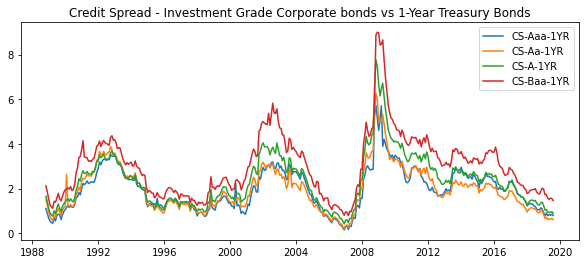

In [58]:

from statsmodels.tsa.arima.model import ARIMA
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# df = get_ytw(start_date='31-08-1988')
#df['CS-Aaa-3MO'].plot()
#df['CS-Aa-3MO'].plot()
#df['CS-A-3MO'].plot()
#df['CS-Baa-3MO'].plot()
#plot.show()
fig = plt.figure(figsize=(10,4))
plt.clf()
title = "Credit Spread - Investment Grade Corporate bonds vs 1-Year Treasury Bonds"
plt.title(title, fontsize=12)
plt.plot(df['CS-Aaa-1YR'])
plt.plot(df['CS-Aa-1YR'])
plt.plot(df['CS-A-1YR'])
plt.plot(df['CS-Baa-1YR'])
plt.legend(('CS-Aaa-1YR', 'CS-Aa-1YR', 'CS-A-1YR', 'CS-Baa-1YR'), fontsize=10)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x124b39a00&gt;

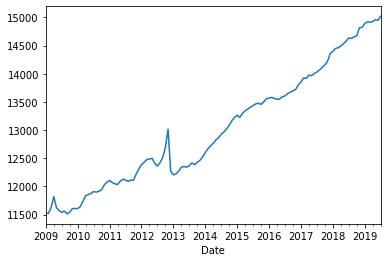

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = get_ytw()
df['Econ-DSPIC96'].plot()